**CP 8.1: A low-pass filter**
This circuit acts as a low-pass filter: you send a signal in on the left
and it comes out filtered on the right.

Using Ohm's law and the capacitor law and assuming that the output load has
very high impedance, so that a negligible amount of current flows through
it, we can write down the equations governing this circuit as follows.  Let
$I$ be the current that flows through $R$ and into the capacitor, and let
$Q$ be the charge on the capacitor.  Then:
$$IR = V_\textrm{in} - V_\textrm{out}\,,\qquad$$
 $$4Q = CV_\textrm{out}\,,\qquad$$
 $$I = {dQ\over dt}.$$
Substituting the second equation into the third, then substituting the
result into the first equation, we find that $V_\textrm{in} -
V_\textrm{out} = RC\>({ dV_\textrm{out}/dt})$, or equivalently
$${d V_\textrm{out}\over dt} = {1\over RC}
                               \bigl( V_\textrm{in} - V_\textrm{out} \bigr).$$
a) Write a program (or modify a previous one) to solve this equation for
  $V_\textrm{out}(t)$ using the fourth-order Runge Kutta method when in
  the input signal is a square-wave with frequency 1 and amplitude 1:
\begin{equation}
V_\textrm{in}(t) = \begin{cases}
                     1  & \qquad\mbox{if $\lfloor 2t \rfloor$ is even,} \\
                     -1 & \qquad\mbox{if $\lfloor 2t \rfloor$ is odd,}
                   \end{cases}
\end{equation}
where $\lfloor x\rfloor$ means $x$ rounded down to the next lowest integer.
Use the program to make plots of the output of the filter circuit from
$t=0$ to $t=10$ when $RC=0.01$, $0.1$, and 1, with initial
condition $V_\textrm{out}(0)=0$.  You will have to make a decision about
what value of $h$ to use in your calculation.  Small values give more
accurate results, but the program will take longer to run.  Try a variety
of different values and choose one for your final calculations that seems
sensible to you. $$ $$
b) Based on the graphs produced by your program, describe what you see
  and explain what the circuit is doing.

In [26]:
#imports 
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from time import time

Text(0, 0.5, 'V_OUT(t)')

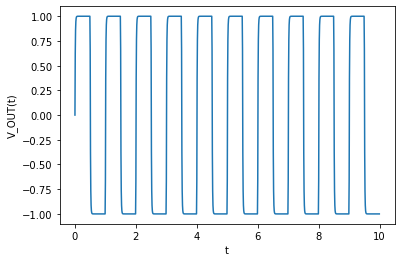

In [43]:
RC = 0.01

def f(x, t):
    if math.floor(2 * t) % 2 == 0:
        vin = 1
    else:
        vin = -1
    return 1 / RC * (vin - x)

a = 0.0 
b = 10
N = 1000
h = (b - a) / N

tpoints = np.arange(a, b, h)
xpoints = []
x = 0.0
for t in tpoints:
    xpoints.append(x)
    k1 = h * f(x, t)
    k2 = h * f(x + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(x + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(x + k3, t + h)
    x += (k1 + 2 * k2 + 2 * k3 + k4) / 6
plt.plot(tpoints, xpoints)
plt.xlabel('t')
plt.ylabel('V_OUT(t)')


Text(0.5, 1.0, 'RC = 0.1 Plot')

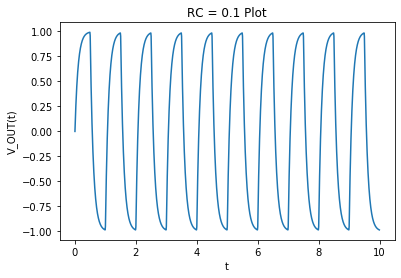

In [44]:
RC = 0.1

def f(x, t):
    if math.floor(2 * t) % 2 == 0:
        vin = 1
    else:
        vin = -1
    return 1 / RC * (vin - x)

a = 0.0 
b = 10
N = 1000
h = (b - a) / N

tpoints = np.arange(a, b, h)
xpoints = []
x = 0.0
for t in tpoints:
    xpoints.append(x)
    k1 = h * f(x, t)
    k2 = h * f(x + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(x + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(x + k3, t + h)
    x += (k1 + 2 * k2 + 2 * k3 + k4) / 6
plt.plot(tpoints, xpoints)
plt.xlabel('t')
plt.ylabel('V_OUT(t)')
plt.title('RC = 0.1 Plot')

Text(0.5, 1.0, 'RC = 1.0 Plot')

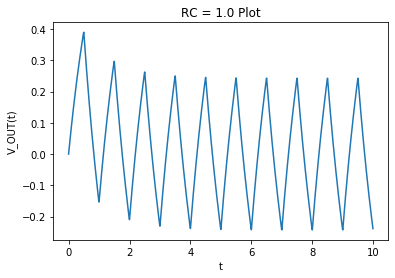

In [42]:
RC = 1.0

def f(x, t):
    if math.floor(2 * t) % 2 == 0:
        vin = 1
    else:
        vin = -1
    return 1 / RC * (vin - x)

a = 0.0 
b = 10
N = 1000
h = (b - a) / N

tpoints = np.arange(a, b, h)
xpoints = []
x = 0.0
for t in tpoints:
    xpoints.append(x)
    k1 = h * f(x, t)
    k2 = h * f(x + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(x + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(x + k3, t + h)
    x += (k1 + 2 * k2 + 2 * k3 + k4) / 6
plt.plot(tpoints, xpoints)
plt.xlabel('t')
plt.ylabel('V_OUT(t)')
plt.title('RC = 1.0 Plot')

The voltage out value appears to be decreasing in amplitude as RC is increased. Likewise, increasing RC increases the frequency of the oscillation. 

**CP 8.2**
The Lotka Volterra equations are a
mathematical model of predator--prey interactions between biological
species.  Let two variables $x$ and $y$ be proportional to the size of the
populations of two species, traditionally called rabbits (the
prey) and foxes (the predators).  You could think of $x$ and $y$ as
being the population in thousands, say, so that $x=2$ means there are 2000
rabbits.  Strictly the only allowed values of $x$ and~$y$ would then be
multiples of 0.001, since you can only have whole numbers of rabbits or
foxes.  But 0.001 is a pretty close spacing of values, so it's a decent
approximation to treat $x$ and $y$ as continuous real numbers so long as
neither gets very close to zero.

In the Lotka Volterra model the rabbits reproduce at a rate proportional
to their population, but are eaten by the foxes at a rate proportional to
both their own population and the population of foxes:
$${d x\over d t} = \alpha x - \beta xy,$$
where $\alpha$ and $\beta$ are constants.  At the same time the foxes
reproduce at a rate proportional the rate at which they eat
rabbits---because they need food to grow and reproduce---but also die of
old age at a rate proportional to their own population:
$${d y\over d t} = \gamma xy - \delta y,$$
where $\gamma$ and $\delta$ are also constants.
$$ $$
a) Write a program to solve these equations using the fourth-order
  Runge Kutta method for the case $\alpha=1$, $\beta=\gamma=0.5$, and
  $\delta=2$, starting from the initial condition $x=y=2$.  Have the
  program make a graph showing both $x$ and $y$ as a function of time on
  the same axes from $t=0$ to $t=30$.  (Hint: Notice that the differential
  equations in this case do not depend explicitly on time $t$ in vector
  notation, the right-hand side of each equation is a function $f(\vec{r})$
  with no $t$ dependence.  You may nonetheless find it convenient to define
  a Python function |f(r,t)| including the time variable, so that your
  program takes the same form as programs given earlier in this chapter.
  You don't have to do it that way, but it can avoid some confusion.
  Several of the following exercises have a similar lack of explicit
  time-dependence.) $$ $$
b) Describe in words what is going on in the system, in terms of rabbits
  and foxes.


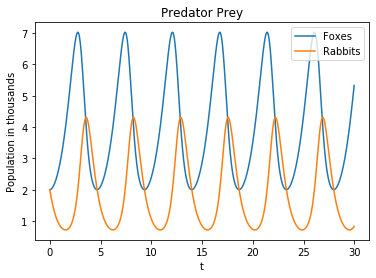

In [5]:
alpha = 1
beta = 0.5
gamma = 0.5 
delta = 2
a = 0.0
b = 30.0
N = 1000
h = (b - a) / N

def f(r, t):
    x = r[0]
    y = r[1]
    fx = alpha * x - beta * x * y
    fy = gamma * x * y - delta * y
    return np.array([fx, fy], float)

tpoints = np.arange(a, b, h)
xpoints = []
ypoints = []
r = np.array([2.0, 2.0], float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
plt.plot(tpoints, xpoints, label = 'Foxes')
plt.plot(tpoints, ypoints, label = 'Rabbits')
plt.xlabel('t')
plt.ylabel('Population in thousands')
plt.title('Predator Prey')
plt.legend(['Foxes', 'Rabbits'])

From time 0, the Fox poulation increases which forces the rabbit (prey) population to decrease. The population of the predator (Fox) and prey (Rabbit) oscillate with time since they are dependent on one another to survive. The foxes eat rabbits which decreases the rabbit population. The fox population decreases when there are no longer enough rabbits to eat. Which in turn, increases the rabbit population. ETC...

**CP 8.3**
One of the most celebrated sets of differential equations in
physics is the Lorenz equations:
$${d x\over d t} = \sigma(y-x),\qquad
{d y\over d t} = rx - y - xz,\qquad
{d z\over d t} = xy - bz,$$
where $\sigma$, $r$, and $b$ are constants.  (The names $\sigma$, $r$,
and $b$ are odd, but traditional they are always used in these equations
for historical reasons.)

These equations were first studied by Edward Lorenz in 1963, who
derived them from a simplified model of weather patterns.  The
reason for their fame is that they were one of the first incontrovertible
examples of deterministic chaos, the occurrence of apparently
random motion even though there is no randomness built into the equations.
We encountered a different example of chaos in the logistic map of
Exercise 3.6. $$ $$
a) Write a program to solve the Lorenz equations for the case
  $\sigma=10$, $r=28$, and~$b=\frac83$ in the range from $t=0$ to $t=50$
  with initial conditions $(x,y,z)=(0,1,0)$.  Have your program make a plot
  of $y$ as a function of time.  Note the unpredictable nature of the
  motion.  (Hint: If you base your program on previous ones, be careful.
  This problem has parameters $r$ and $b$ with the same names as variables
  in previous programs---make sure to give your variables new names, or use
  different names for the parameters, to avoid introducing errors into your
  code.) $$ $$
b) Modify your program to produce a plot of $z$ against $x$.  You should
  see a picture of the famous strange attractor of the Lorenz
  equations, a lop-sided butterfly-shaped plot that never repeats itself.


Text(0.5, 1.0, 'y Position through time')

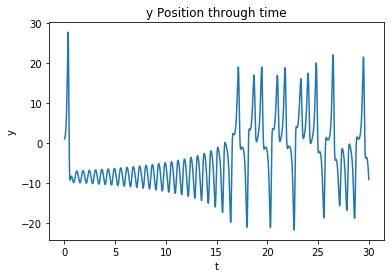

In [5]:
sigma = 10
R = 28
B = 8 / 3

def f(r, t):
    x = r[0]
    y = r[1]
    z = r[2]
    fx = sigma * (y - x)
    fy = R * x - y - x * z
    fz = x * y - B * z
    return np.array([fx, fy, fz], float)

a = 0.0
b = 30.0
N = 10000
h = (b - a) / N

tpoints = np.arange(a, b, h)
xpoints = []
ypoints = []
zpoints = []
r = np.array([0.0, 1.0, 0.0], float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    zpoints.append(r[2])
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
plt.plot(tpoints, ypoints)
plt.xlabel('t')
plt.ylabel('y')
plt.title('y Position through time')


Text(0, 0.5, 'z')

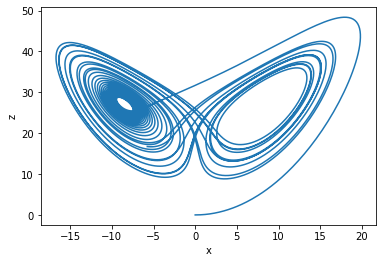

In [6]:
#part b
plt.plot(xpoints, zpoints)
plt.xlabel('x')
plt.ylabel('z')


**CP 8.7** $$ $$
Many elementary mechanics problems deal with the physics of objects
moving or flying through the air, but they almost always ignore friction
and air resistance to make the equations solvable.  If we're using a
computer, however, we don't need solvable equations.

Consider, for instance, a spherical cannonball shot from a cannon standing
on level ground.  The air resistance on a moving sphere is a force in the
opposite direction to the motion with magnitude
$$F = \frac{1}{2} \pi R^2\rho C v^2,$$
where $R$ is the sphere's radius, $\rho$ is the density of air, $v$ is the
velocity, and $C$ is the so-called coefficient of drag (a
property of the shape of the moving object, in this case a sphere).$$ $$
a) Starting from Newton's second law, $F=ma$, show that the
  equations of motion for the position $(x,y)$ of the cannonball are
$$\ddot{x} = - {\pi R^2\rho C\over2m}\,
             \dot{x}\sqrt{\dot{x}^2+\dot{y}^2},
             \qquad \ddot{y} =  - g - {\pi R^2\rho C\over2m}\,
             \dot{y}\sqrt{\dot{x}^2+\dot{y}^2},$$
where $m$ is the mass of the cannonball, $g$ is the acceleration due to
gravity, and $\dot{x}$ and $\ddot{x}$ are the first and second derivatives
of $x$ with respect to time. $$ $$
$F_{drag}$ splits into $$ma_x = F_{drag}, ma_y = F_{drag} + F_g$$
$$a_x = - \frac{\pi R^2 \rho C}{2 m} v_x^2$$
Sub $v_x = \dot{x} = \dot{x} \sqrt{\dot{x}^2 + \dot{y}^2}$ and $a_x = \ddot{x}$
$$\ddot{x} = \frac{\pi R^2 \rho C}{2 m} \dot{x} \sqrt{\dot{x}^2 + \dot{y}^2}$$
Similarly for $F_y$ we obtain 
$$\ddot{y} = -g - \frac{\pi R^2 \rho C}{2 m} \dot{y} \sqrt{\dot{x}^2 + \dot{y}^2}$$
Set $$\frac{dx}{dt} = z$$ and $$\frac{dy}{dt} = w$$
Finally we obtain, $$\frac{dz}{dt} = \frac{\pi R^2 \rho C}{2 m} z \sqrt{z^2 + w^2}$$ and $$\frac{dw}{dt} = \frac{\pi R^2 \rho C}{2 m} w \sqrt{z^2 + w^2}$$






$$ $$
b) Change these two second-order equations into four first-order
  equations using the methods you have learned, then write a program that
  solves the equations for a cannonball of mass $1\,$kg and radius $8\,$cm,
  shot at $30^\circ$ to the horizontal with initial velocity
  $100\,\mathrm{ms}^{-1}$.  The density of air is
  $\rho=1.22\,\textrm{kg}\,\textrm{m}^{-3}$ and the coefficient of drag for
  a sphere is $C=0.47$.  Make a plot of the trajectory of the cannonball
  (i.e., a graph of $y$ as a function of $x$). $$ $$
c) When one ignores air resistance, the distance traveled by a
  projectile does not depend on the mass of the projectile.  In real life,
  however, mass certainly does make a difference.  Use your program to
  estimate the total distance traveled (over horizontal ground) by the
  cannonball above, and then experiment with the program to determine
  whether the cannonball travels further if it is heavier or lighter.  You
  could, for instance, plot a series of trajectories for cannonballs of
  different masses, or you could make a graph of distance traveled as a
  function of mass.  Describe briefly what you discover.



(-14.32575219454452,
 300.84079608543493,
 -120.47792188054126,
 63.76941010382852)

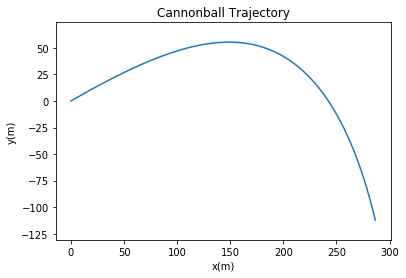

In [21]:
m = 1
R = 0.08
v0 = 100
theta = np.pi / 6
C = 0.47
g = 9.81
rho = 1.22

def f(r, t):
    x = r[0]
    y = r[1]
    z = r[2]
    w = r[3]
    fx = z
    fy = w
    fz = -(np.pi * (R**2) * rho * C / (2 * m)) * z * (z**2 + w**2)**0.5
    fw = -g - (np.pi * (R**2) * rho * C / (2 * m)) * w * (z**2 + w**2)**0.5
    return np.array([fx, fy, fz, fw], float)

a = 0.0
b = 10.0
N = 1000
h = (b - a) / N
tpoints = np.arange(a, b, h)
xpoints = []
ypoints = []
zpoints = []
wpoints = []
r = np.array([0.0, 0.0, v0 * math.cos(theta), v0 * math.sin(theta)], float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    zpoints.append(r[2])
    wpoints.append(r[3])
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
plt.plot(xpoints, ypoints)
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.title('Cannonball Trajectory')
plt.axis('equal')
    
    
    
    
    

Text(0, 0.5, 'x(m)')

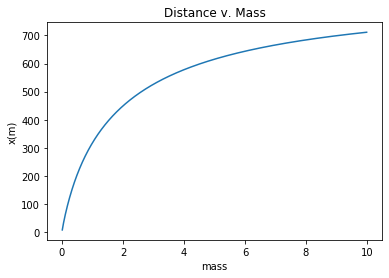

In [25]:
m = 1
R = 0.08
v0 = 100
theta = np.pi / 6
C = 0.47
g = 9.81
rho = 1.22

def f(r, t, M):
    x = r[0]
    y = r[1]
    z = r[2]
    w = r[3]
    fx = z
    fy = w
    fz = -(np.pi * (R**2) * rho * C / (2 * M)) * z * (z**2 + w**2)**0.5
    fw = -g - (np.pi * (R**2) * rho * C / (2 * M)) * w * (z**2 + w**2)**0.5
    return np.array([fx, fy, fz, fw], float)

a = 0.0
b = 10.0
N = 1000
h = (b - a) / N
tpoints = np.arange(a, b, h)
xpoints = []
ypoints = []
zpoints = []
wpoints = []
m_vals = np.arange(0.01, 10, h)
dist_max = []
r = np.array([0.0, 0.0, v0 * math.cos(theta), v0 * math.sin(theta)], float)
for i, mass in enumerate(m_vals):
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        zpoints.append(r[2])
        wpoints.append(r[3])
        k1 = h * f(r, t, M)
        k2 = h * f(r + 0.5 * k1, t + 0.5 * h, mass)
        k3 = h * f(r + 0.5 * k2, t + 0.5 * h, mass)
        k4 = h * f(r + k3, t + h, mass)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    max_dist = max(xpoints)
    dist_max.append(max_dist)
    xpoints, ypoints, zpoints, wpoints = [], [], [], []
    r = np.array([0.0, 0.0, v0 * math.cos(theta), v0 * math.sin(theta)], float)

plt.plot(m_vals, dist_max)
plt.title('Distance v. Mass')
plt.xlabel('mass')
plt.ylabel('x(m)')
        
        
        

With an increase in mass, the cannonball's distance increases logarithmically as expected. The incraese in mass is expected to increase the distance but only up to a certain mass due to factoring in drag force. 

**CP 8.16** 
If you mastered Exercise 8.10 on cometary orbits, here's a more
challenging problem in celestial mechanics and a classic in the
field the three-body problem.

  Three stars, in otherwise empty space, are initially at rest, with the
  following masses and positions, in arbitrary units:
\begin{pmatrix}
       & Mass & x & y \\
Star 1 & 150 & 3 & 1 \\
Star 2 & 200 & -1 & -2 \\
Star 3 & 250 & -1 & 1
\end{pmatrix}

(All the $z$ coordinates are zero, so the three stars lie in the $xy$
plane.) $$ $$
a) Show that the equation of motion governing the position $\vec{r}_1$
  of the first star is
$${d^2\vec{r}_1\over d t^2}= Gm_2{\vec{r}_2-\vec{r}_1\over|\vec{r}_2-\vec{r}_1|^3}+ Gm_3{\vec{r}_3-\vec{r}_1\over|\vec{r}_3-\vec{r}_1|^3}$$
and derive two similar equations for the positions $\vec{r}_2$ and
$\vec{r}_3$ of the other two stars.  Then convert the three second-order
equations into six equivalent first-order equations, using the techniques
you have learned. $$ $$
$$m_1 a_1 = F_2 + F_3$$
for, $$F_2 = \frac{Gm_2 m_1}{r^2}\hat{r} \ F_3 = \frac{Gm_3}{r^2}\hat{r}$$
$$a_1 = \frac{Gm_2}{r^2}\hat{r} + \frac{Gm_3}{r^2}\hat{r}$$
$$a_1 = \frac{Gm_2(r_2 - r_1)}{|r_2 - r_1|^3} + \frac{Gm_3(r_3 - r_1)}{|r_3 - r_1|^3}$$
Re-write to obtain:
$$\frac{d^2 r_1}{dt^2} = Gm_2\frac{(r_2 - r_1)}{|r_2 - r_1|^3} + Gm_3\frac{(r_3 - r_1)}{|r_3 - r_1|^3}$$
Similarly for the other planets:
$$\frac{d^2 r_3}{dt^2} = Gm_1\frac{(r_1 - r_3)}{|r_1 - r_3|^3} + Gm_2\frac{(r_2 - r_3)}{|r_2 - r_3|^3}$$
$$\frac{d^2 r_2}{dt^2} = Gm_1\frac{(r_1 - r_2)}{|r_1 - r_2|^3} + Gm_3\frac{(r_3 - r_2)}{|r_3 - r_2|^3}$$
To aid in solving, 
Let $$\frac{dr_1}{dt} = u$$ $$\frac{dr_2}{dt} = v$$ and $$\frac{dr_3}{dt} = w$$
and proceed with the usual substitutions...



$$ $$
b) Working in units where $G=1$, write a program to solve your equations
  and hence calculate the motion of the stars from $t=0$ to $t=2$.  Make a
  plot showing the trails of all three stars (i.e., a graph of $y$
  against $x$ for each star). $$ $$
To do this calculation properly you will need to use an adaptive step size
method, for the same reasons as in Exercise 8.10 the stars move very
rapidly when they are close together and very slowly when they are far
apart.  An adaptive method is the only way to get the accuracy you need in
the fast-moving parts of the motion without wasting hours uselessly
calculating the slow parts with a tiny step size.  Construct your program
so that it introduces an error of no more than $10^{-3}$ in the position of
any star per unit time.

Creating an animation with an adaptive step size can be challenging,
since the steps do not all correspond to the same amount of real time.  The
simplest thing to do is just to ignore the varying step sizes and make an
animation as if they were all equal, updating the positions of the stars on
the screen at every step or every several steps.  This will give you a
reasonable visualization of the motion, but it will look a little odd
because the stars will slow down, rather than speed up, as they come close
together, because the adaptive calculation will automatically take more
steps in this region.

A better solution is to vary the frame-rate of your animation so that the
frames run proportionally faster when $h$ is smaller, meaning that the
frame-rate needs to be equal to $C/h$ for some constant $C$.  You can
achieve this by using the \verb|rate| function from the
\verb|visual| package to set a different frame-rate on each step, equal to
$C/h$.  If you do this, it's a good idea to not let the value of $h$ grow
too large, or the animation will make some large jumps that look uneven on
the screen.  Insert extra program lines to ensure that $h$ never exceeds a
value $h_\textrm{max}$ that you choose.  Values for the constants of around
$C=0.1$ and $h_\textrm{max}=10^{-3}$ seem to give reasonable results.


In [37]:
G = 1
m1 = 150
m2 = 200
m3 = 250
h_max = 10**-3

def f(r, t):
    x1 = r[0]
    y1 = r[1]
    x2 = r[2]
    y2 = r[3]
    x3 = r[4]
    y3 = r[5]
    u1 = r[6]
    v1 = r[7]
    u2 = r[8]
    v2 = r[9]
    u3 = r[10]
    v3 = r[11]
    fx1 = u1
    fy1 = v1
    fx2 = u2
    fy2 = v2
    fx3 = u3
    fy3 = v3
    R12 = ((x1 - x2)**2 + (y1 - y2)**2)**0.5
    R23 = ((x2 - x3)**2 + (y2 - y3)**2)**0.5
    R31 = ((x3 - x1)**2 + (y1 - y3)**2)**0.5
    fu1 = (G * m2 * (x2 - x1) / (abs(R12)**3)) + (G * m3 * (x3 - x1) / (abs(R31)**3))
    fv1 = (G * m2 * (y2 - y1) / (abs(R12)**3)) + (G * m3 * (y3 - y1) / (abs(R31)**3))
    fu2 = (G * m1 * (x1 - x2) / (abs(R12)**3)) + (G * m3 * (x3 - x2) / (abs(R23)**3))
    fv2 = (G * m1 * (y1 - y2) / (abs(R12)**3)) + (G * m3 * (y3 - y2) / (abs(R23)**3))
    fu3 = (G * m1 * (x1 - x3) / (abs(R31)**3)) + (G * m2 * (x2 - x3) / (abs(R23)**3))
    fv3 = (G * m1 * (y1 - y3) / (abs(R31)**3)) + (G * m2 * (y2 - y3) / (abs(R23)**3))
    return np.array([fx1, fy1, fx2, fy2, fx3, fy3, fu1, fv1, fu2, fv2, fu3, fv3], float)

a = 0.0
b = 2.0 
t = 0.0
h = 0.0001

tpoints = []
x1points = []
y1points = []
x2points = []
y2points = []
x3points = []
y3points = []
r = np.array([3.0, 1.0, -1.0, -2.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], float)

while t < b:
    x1points.append(r[0])
    y1points.append(r[1])
    x2points.append(r[2])
    y2points.append(r[3])
    x3points.append(r[4])
    y3points.append(r[5])
    tpoints.append(t)
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r1 = r + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    k1 = h * f(r1, t + h)
    k2 = h * f(r1 + 0.5 * k1, t + h + 0.5 * h)
    k3 = h * f(r1 + 0.5 * k2, t + h + 0.5 * h)
    k4 = h * f(r1 + k3, t + 2 * h)
    r2 = r1 + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    k1 = 2 * h * f(r, t)
    k2 = 2 * h * f(r + 0.5 * k1, t + h)
    k3 = 2 * h * f(r + 0.5 * k2, t + h)
    k4 = 2 * h * f(r + k3, t + 2 * h)
    r3 = r + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    epx1 = (1 / 30) * (r2[0] - r3[0])
    epy1 = (1 / 30) * (r2[1] - r3[1])
    epx2 = (1 / 30) * (r2[2] - r3[2])
    epy2 = (1 / 30) * (r2[3] - r3[3])
    epx3 = (1 / 30) * (r2[4] - r3[4])
    epy3 = (1 / 30) * (r2[5] - r3[5])
    l2_1 = (epx1**2 + epy1**2)**0.5
    l2_2 = (epx2**2 + epy2**2)**0.5
    l2_3 = (epx3**2 + epy3**2)**0.5
    max_error = max([l2_1, l2_2, l2_3])
    
    if max_error > 10**-14:
        rho = h * h_max / max_error
        if rho > 1:
            r = np.copy(r2)
            t += 2 * h
            h *= min([rho**0.25, 2])
        else:
            h *= min([rho**0.25, 2])
            for i in range(2):
                k1 = h * f(r, t)
                k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
                k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
                k4 = h * f(r + k3, t + h)
                r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
                t += h
    else:
        r = np.copy(r2)
        t += 2 * h
        h *= 2
    

(-1.6845186198220121,
 3.2230723152296195,
 -3.0261674925695603,
 3.4360342588986694)

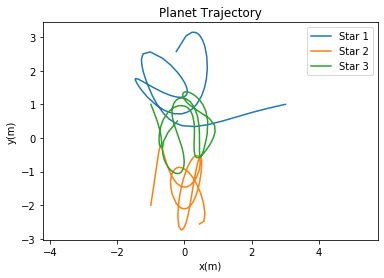

In [38]:
plt.plot(x1points, y1points)
plt.plot(x2points, y2points)
plt.plot(x3points, y3points)
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.legend(['Star 1', 'Star 2', 'Star 3'])
plt.title('Planet Trajectory')
plt.axis('equal')

**CP 9.3** $$ $$
For simplicity let us model the system in two dimensions.  Using any of the
methods we have studied, write a program to calculate the electrostatic
potential in the box on a grid of $100\times100$ points, where the walls of
the box are at voltage zero and the two plates (which are of negligible
thickness) are at voltages $\pm1\,$V as shown.  Have your program calculate
the value of the potential at each grid point to a precision of
$10^{-6}\,$volts and then make a density plot of the result.

Hint: Notice that the capacitor plates are at fixed voltage, not
fixed charge, so this problem differs from the problem with the two charges
in Exercise 9.1.  In effect, the capacitor plates are part of the boundary
condition in this case: they behave the same way as the walls of the box,
with potentials that are fixed at a certain value and cannot change.

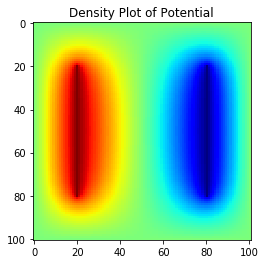

In [41]:
M = 100
V = 1
target = 10 ** -6
omega = 0.9
phi = np.zeros([M + 1, M + 1], float)
phi[0, :] = 0
phi[:, 0] = 0
phi[M, :] = 0
phi[:, M] = 0
phi[20:81, 20] = 1
phi[20:81, 80] = -1
delta = 1.0
t_start = time()
while delta > target:
    delta = 0.0
    for i in range(M + 1):
        for j in range(M + 1):
            if i == 0 or i == M or j == 0 or j == M or (20 <= i <= 80 and j == 20) or (20 <= i <= 80 and j == 80):
                continue
            else:
                temp = phi[i, j]
                phi[i, j] = (1 + omega) * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) / 4 - omega * phi[i, j]
                difference = abs(temp - phi[i, j])
                if difference > delta:
                    delta = difference
t_end = time()
total = t_end - t_start
plt.imshow(phi)
plt.jet()
plt.title('Density Plot of Potential')
plt.show()
